# 2018 Bay Wheels Ride Data Exploration and Visualization

### By Elham Daha

## Table of Contents

- Introduction
- Preliminary Wrangling
- Univariate Exploration
- Bivariate Explorationn
- Multivariate Exploration
- Summary
- Sources

## Introduction

## Investigation Overview

In this investigation of the Ford GoBike System, I wanted to look at the most common customer behaviors and characteristics, specifically how user type, time, gender, and age impacts usage of the system.

## Dataset Overview

Ford GoBike is the Bay Area's bike share system. Bay Area Bike Share was introduced in 2013 as a pilot program for the region, with 700 bikes and 70 stations across San Francisco and San Jose. Once expansion is complete, Ford GoBike will grow to 7,000 bikes across San Francisco, the East Bay and San Jose.

Ford GoBike, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. People use bike share to commute to work or school, run errands, get to appointments or social engagements and more. It's a fun, convenient and affordable way to get around.

The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.

See the data here

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import glob
import os
import datetime

### Gathering 

#### Specifying folder path where all the files from 2018 are stored

In [2]:
path =r'C:\Users\edaha\Desktop\Courses\DataAnalyst\Session5\Project5\Data'

files = glob.glob(os.path.join(path, "*.csv"))

#### Reading the content from all the files and concatenating them into a single fil

In [3]:
df = pd.concat((pd.read_csv(f) for f in files), ignore_index = True)

df.to_csv('master_file.csv', index=False)

In [4]:
df_new = pd.read_csv('master_file.csv')

In [5]:
df_new.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No


In [6]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 14 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
dtypes: float64(6), int64(2), object(6)
memory usage: 199.1+ MB


In [7]:
df_new.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
321317,1732,2018-04-29 12:22:16.3440,2018-04-29 12:51:09.0440,19.0,Post St at Kearny St,37.788975,-122.403452,70.0,Central Ave at Fell St,37.773311,-122.444293,3681,Customer,No
562575,171,2018-05-11 06:24:03.9970,2018-05-11 06:26:55.3100,105.0,16th St at Prosper St,37.764285,-122.431804,96.0,Dolores St at 15th St,37.766210,-122.426614,687,Subscriber,No
1448977,125,2018-10-23 19:25:59.1790,2018-10-23 19:28:04.8590,26.0,1st St at Folsom St,37.787290,-122.394380,24.0,Spear St at Folsom St,37.789677,-122.390428,2296,Subscriber,Yes
1454165,312,2018-10-23 08:36:51.5310,2018-10-23 08:42:03.5980,164.0,Isabella St at San Pablo Ave,37.814988,-122.274844,182.0,19th Street BART Station,37.809013,-122.268247,3490,Subscriber,No
704505,299,2018-06-19 08:49:13.2430,2018-06-19 08:54:12.7910,46.0,San Antonio Park,37.790140,-122.242373,221.0,12th St at 6th Ave,37.794353,-122.253874,3066,Subscriber,Yes
50877,532,2018-01-17 10:51:15.1130,2018-01-17 11:00:07.9590,178.0,Broadway at 30th St,37.819381,-122.261928,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,2483,Subscriber,No
786535,1157,2018-06-06 08:26:15.1020,2018-06-06 08:45:32.5470,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,88.0,11th St at Bryant St,37.770030,-122.411726,3828,Subscriber,No
1102445,816,2018-08-17 21:03:10.6080,2018-08-17 21:16:47.3110,291.0,Autumn Parkway at Coleman Ave,37.341335,-121.903183,309.0,San Jose City Hall,37.337391,-121.886995,580,Subscriber,No
777683,346,2018-06-07 11:16:37.1010,2018-06-07 11:22:23.1450,200.0,2nd Ave at E 18th St,37.800214,-122.253810,163.0,Lake Merritt BART Station,37.797320,-122.265320,991,Subscriber,No
356229,2346,2018-04-22 16:15:17.4200,2018-04-22 16:54:23.6840,71.0,Broderick St at Oak St,37.773063,-122.439078,71.0,Broderick St at Oak St,37.773063,-122.439078,3101,Customer,No


In [8]:
df_new.shape

(1863721, 14)

In [9]:
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 14 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         float64       
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           float64       
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  int64         
 12  user_type                object        
 13  bike_share_for_all_trip  object        
dtypes: datetime64[ns](2), float64(6), int64(2), object(4)
memory usage: 199.1+ MB


In [11]:
# Let's also get some additional description for stats figures
df_new.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.863721e+06
mean,8.573026e+02,1.196744e+02,3.776678e+01,-1.223492e+02,1.181730e+02,3.776690e+01,-1.223487e+02,2.296851e+03
std,2.370379e+03,1.003976e+02,1.057689e-01,1.654634e-01,1.004403e+02,1.056483e-01,1.650597e-01,1.287733e+03
min,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,3.000000e+00,3.726331e+01,-1.224737e+02,1.100000e+01
25%,3.500000e+02,3.300000e+01,3.777106e+01,-1.224114e+02,3.000000e+01,3.777106e+01,-1.224094e+02,1.225000e+03
50%,5.560000e+02,8.900000e+01,3.778107e+01,-1.223974e+02,8.800000e+01,3.778127e+01,-1.223971e+02,2.338000e+03
75%,8.720000e+02,1.860000e+02,3.779625e+01,-1.222865e+02,1.830000e+02,3.779728e+01,-1.222894e+02,3.333000e+03
max,8.636600e+04,3.810000e+02,4.551000e+01,-7.357000e+01,3.810000e+02,4.551000e+01,-7.357000e+01,6.234000e+03


In [12]:
# Any duplicates?
df_new.duplicated().sum()
# No duplicates here - that was straightforward

0

In [13]:
# What about NaN values?
df_new.isna().sum()
# It looks like some of the starting and ending values are NaN.

duration_sec                   0
start_time                     0
end_time                       0
start_station_id           11771
start_station_name         11771
start_station_latitude         0
start_station_longitude        0
end_station_id             11771
end_station_name           11771
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
bike_share_for_all_trip        0
dtype: int64

In [14]:
#Are there duplicated bike ids?
df_new[df_new.bike_id.duplicated()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
36,196,2018-01-31 22:55:25.4130,2018-01-31 22:58:42.1420,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,81.0,Berry St at 4th St,37.775880,-122.393170,1403,Subscriber,No
53,520,2018-01-31 22:32:52.9330,2018-01-31 22:41:33.1470,146.0,30th St at San Jose Ave,37.742314,-122.423181,98.0,Valencia St at 16th St,37.765052,-122.421866,1278,Subscriber,No
61,612,2018-01-31 22:21:06.9690,2018-01-31 22:31:18.9740,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,99.0,Folsom St at 15th St,37.767037,-122.415442,3379,Subscriber,No
86,12167,2018-01-31 18:45:53.0990,2018-01-31 22:08:40.1500,64.0,5th St at Brannan St,37.776754,-122.399018,58.0,Market St at 10th St,37.776619,-122.417385,3483,Customer,No
92,2440,2018-01-31 21:23:58.0530,2018-01-31 22:04:38.7510,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,41.0,Golden Gate Ave at Polk St,37.781270,-122.418740,236,Customer,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1863716,473,2018-12-01 00:11:54.8110,2018-12-01 00:19:48.5470,345.0,Hubbell St at 16th St,37.766474,-122.398295,81.0,Berry St at 4th St,37.775880,-122.393170,3035,Subscriber,No
1863717,841,2018-12-01 00:02:48.7260,2018-12-01 00:16:49.7660,10.0,Washington St at Kearny St,37.795393,-122.404770,58.0,Market St at 10th St,37.776619,-122.417385,2034,Subscriber,No
1863718,260,2018-12-01 00:05:27.6150,2018-12-01 00:09:47.9560,245.0,Downtown Berkeley BART,37.870139,-122.268422,255.0,Virginia St at Shattuck Ave,37.876573,-122.269528,2243,Subscriber,No
1863719,292,2018-12-01 00:03:06.5490,2018-12-01 00:07:59.0800,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,126.0,Esprit Park,37.761634,-122.390648,545,Subscriber,No


In [15]:
df_new.user_type.value_counts()

Subscriber    1583554
Customer       280167
Name: user_type, dtype: int64

### Cleaning

Before assessing the data to draw conclusions, there are some quality issues (this dataset is tidy) that need to be cleaned (from left to right):

- There are missing values throughout the dataset (start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year, member_gender)
- Start/end times are not in the timestamp format
- The following columns are not in object format:
  - start_station_id
  - end_station_id
  - bike_id
- There are 

In [16]:
# Save the original data set and save as a new, cleaned version while I clean things up
df_cleaned = df_new.copy()

#### Define: Converting several of the columns to the appropriate data type:

- Starting and ending times to the timestamp format
- User type, gender, and bike share for all to category format
- Bike ID, start station ID, and end station ID to object format

In [17]:
# Changing the format to datetime
df_cleaned.start_time = pd.to_datetime(df_cleaned.start_time)
df_cleaned.end_time = pd.to_datetime(df_cleaned.end_time)

In [18]:
# Changing the user_type, and bike_share_for_all_trip to category format
df_cleaned.user_type  = df_cleaned.user_type.astype('category')
df_cleaned.bike_share_for_all_trip = df_cleaned.bike_share_for_all_trip.astype('category')

In [19]:
# Changing the bike_id, start_station_id, and end_station_id to object
df_cleaned.bike_id = df_cleaned.bike_id.astype(str)
df_cleaned.start_station_id = df_cleaned.start_station_id.astype(str)
df_cleaned.end_station_id = df_cleaned.end_station_id.astype(str)

In [20]:
df_cleaned.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 14 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             1863721 non-null  int64         
 1   start_time               1863721 non-null  datetime64[ns]
 2   end_time                 1863721 non-null  datetime64[ns]
 3   start_station_id         1863721 non-null  object        
 4   start_station_name       1851950 non-null  object        
 5   start_station_latitude   1863721 non-null  float64       
 6   start_station_longitude  1863721 non-null  float64       
 7   end_station_id           1863721 non-null  object        
 8   end_station_name         1851950 non-null  object        
 9   end_station_latitude     1863721 non-null  float64       
 10  end_station_longitude    1863721 non-null  float64       
 11  bike_id                  1863721 non-null  object        
 12  

In [21]:
df_cleaned.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,No
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No


#### Define: Records where the start and end station values are null

In [22]:
df_cleaned[df_cleaned.start_station_name.isnull()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
623364,5572,2018-06-30 20:58:31.855,2018-06-30 22:31:24.593,nan,NaN,37.40,-121.94,nan,NaN,37.40,-121.94,4202,Customer,No
623376,573,2018-06-30 22:12:27.511,2018-06-30 22:22:01.174,nan,NaN,37.40,-121.94,nan,NaN,37.40,-121.93,4095,Subscriber,Yes
623393,850,2018-06-30 22:01:25.585,2018-06-30 22:15:36.151,nan,NaN,37.41,-121.94,nan,NaN,37.41,-121.95,4122,Customer,No
623429,562,2018-06-30 21:52:05.118,2018-06-30 22:01:27.440,nan,NaN,37.41,-121.94,nan,NaN,37.42,-121.94,4184,Subscriber,No
623456,819,2018-06-30 21:37:34.506,2018-06-30 21:51:13.729,nan,NaN,37.41,-121.94,nan,NaN,37.41,-121.96,4137,Customer,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860854,663,2018-12-02 09:47:44.116,2018-12-02 09:58:47.162,nan,NaN,37.40,-121.92,nan,NaN,37.39,-121.93,4284,Customer,No
1861409,1141,2018-12-01 21:22:41.646,2018-12-01 21:41:42.727,nan,NaN,37.41,-121.96,nan,NaN,37.41,-121.94,4256,Subscriber,No
1861570,753,2018-12-01 19:57:14.201,2018-12-01 20:09:47.858,nan,NaN,37.41,-121.94,nan,NaN,37.40,-121.93,4181,Subscriber,No
1862625,2244,2018-12-01 14:01:06.252,2018-12-01 14:38:30.895,nan,NaN,37.41,-121.93,nan,NaN,37.42,-121.96,4238,Customer,No


In [23]:
df_cleaned[df_cleaned.end_station_name.isnull()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
623364,5572,2018-06-30 20:58:31.855,2018-06-30 22:31:24.593,nan,NaN,37.40,-121.94,nan,NaN,37.40,-121.94,4202,Customer,No
623376,573,2018-06-30 22:12:27.511,2018-06-30 22:22:01.174,nan,NaN,37.40,-121.94,nan,NaN,37.40,-121.93,4095,Subscriber,Yes
623393,850,2018-06-30 22:01:25.585,2018-06-30 22:15:36.151,nan,NaN,37.41,-121.94,nan,NaN,37.41,-121.95,4122,Customer,No
623429,562,2018-06-30 21:52:05.118,2018-06-30 22:01:27.440,nan,NaN,37.41,-121.94,nan,NaN,37.42,-121.94,4184,Subscriber,No
623456,819,2018-06-30 21:37:34.506,2018-06-30 21:51:13.729,nan,NaN,37.41,-121.94,nan,NaN,37.41,-121.96,4137,Customer,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860854,663,2018-12-02 09:47:44.116,2018-12-02 09:58:47.162,nan,NaN,37.40,-121.92,nan,NaN,37.39,-121.93,4284,Customer,No
1861409,1141,2018-12-01 21:22:41.646,2018-12-01 21:41:42.727,nan,NaN,37.41,-121.96,nan,NaN,37.41,-121.94,4256,Subscriber,No
1861570,753,2018-12-01 19:57:14.201,2018-12-01 20:09:47.858,nan,NaN,37.41,-121.94,nan,NaN,37.40,-121.93,4181,Subscriber,No
1862625,2244,2018-12-01 14:01:06.252,2018-12-01 14:38:30.895,nan,NaN,37.41,-121.93,nan,NaN,37.42,-121.96,4238,Customer,No


### Assessing Data

#### Define: What is the minimum and maximum starting time of the rides? (Timestamp)

In [24]:
df_cleaned.start_time.sort_values()

94662     2018-01-01 00:01:53.847
94801     2018-01-01 00:07:41.040
94800     2018-01-01 00:07:52.943
94799     2018-01-01 00:09:31.745
94793     2018-01-01 00:14:37.187
                    ...          
1732378   2018-12-31 23:49:14.048
1732370   2018-12-31 23:52:27.260
1732371   2018-12-31 23:52:33.089
1732363   2018-12-31 23:59:11.882
1732362   2018-12-31 23:59:12.097
Name: start_time, Length: 1863721, dtype: datetime64[ns]

In [25]:
#Different Start and End stations
df_cleaned.start_station_name.value_counts()

San Francisco Ferry Building (Harry Bridges Plaza)           38461
San Francisco Caltrain Station 2  (Townsend St at 4th St)    37617
San Francisco Caltrain (Townsend St at 4th St)               35092
Market St at 10th St                                         34918
Berry St at 4th St                                           33716
                                                             ...  
William St at 4th St (Temporary Location)                       26
Viva Calle SJ                                                   25
Williams Ave at 3rd St                                          17
Farnam St at Fruitvale Ave                                      14
2nd St at S Park St                                             11
Name: start_station_name, Length: 348, dtype: int64

In [26]:
df_cleaned.end_station_name.value_counts()

San Francisco Caltrain Station 2  (Townsend St at 4th St)    50000
San Francisco Ferry Building (Harry Bridges Plaza)           44113
San Francisco Caltrain (Townsend St at 4th St)               42970
The Embarcadero at Sansome St                                39222
Montgomery St BART Station (Market St at 2nd St)             35955
                                                             ...  
2nd St at S Park St                                             33
Lane St at Van Dyke Ave                                         33
Williams Ave at 3rd St                                          24
Viva Calle SJ                                                   15
Farnam St at Fruitvale Ave                                      12
Name: end_station_name, Length: 348, dtype: int64

#### Define: Who are the different user types?

In [27]:
df_cleaned.user_type.value_counts()

Subscriber    1583554
Customer       280167
Name: user_type, dtype: int64

“Subscriber” = Member or “Customer” = Casual)

In [28]:
df_cleaned.shape

(1863721, 14)

#### Define: Maximum and Minimum duration of rides in general

In [29]:
df_cleaned.duration_sec.min()

61

In [30]:
df_cleaned.duration_sec.max()

86366

#### Define: Does the Customer or Subscriber share trips?

In [31]:
df_cleaned[(df_cleaned.user_type == 'Customer') & (df_cleaned.bike_share_for_all_trip == 'Yes')]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip


In [32]:
df_cleaned[(df_cleaned.user_type == 'Subscriber') & (df_cleaned.bike_share_for_all_trip == 'Yes')]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
8,996,2018-01-31 23:34:56.004,2018-01-31 23:51:32.674,134.0,Valencia St at 24th St,37.752428,-122.420628,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,3675,Subscriber,Yes
9,825,2018-01-31 23:34:14.027,2018-01-31 23:47:59.809,305.0,Ryland Park,37.342725,-121.895617,317.0,San Salvador St at 9th St,37.333955,-121.877349,1453,Subscriber,Yes
13,887,2018-01-31 23:24:16.357,2018-01-31 23:39:04.123,308.0,San Pedro Square,37.336802,-121.894090,297.0,Locust St at Grant St,37.322980,-121.887931,55,Subscriber,Yes
16,808,2018-01-31 23:19:58.603,2018-01-31 23:33:27.531,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,98.0,Valencia St at 16th St,37.765052,-122.421866,3041,Subscriber,Yes
22,150,2018-01-31 23:10:09.586,2018-01-31 23:12:40.333,182.0,19th Street BART Station,37.809013,-122.268247,183.0,Telegraph Ave at 19th St,37.808702,-122.269927,3468,Subscriber,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1863669,223,2018-12-01 01:10:52.829,2018-12-01 01:14:36.292,357.0,2nd St at Julian St,37.341132,-121.892844,309.0,San Jose City Hall,37.337391,-121.886995,637,Subscriber,Yes
1863670,391,2018-12-01 01:07:13.163,2018-12-01 01:13:44.981,317.0,San Salvador St at 9th St,37.333955,-121.877349,286.0,San Carlos St at 11th St,37.336466,-121.876613,73,Subscriber,Yes
1863695,1310,2018-12-01 00:23:53.342,2018-12-01 00:45:43.588,85.0,Church St at Duboce Ave,37.770083,-122.429156,13.0,Commercial St at Montgomery St,37.794231,-122.402923,1525,Subscriber,Yes
1863704,447,2018-12-01 00:31:36.148,2018-12-01 00:39:03.391,368.0,Myrtle St at Polk St,37.785434,-122.419622,17.0,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,1677,Subscriber,Yes


In [33]:
df_new[(df_cleaned.user_type == 'Subscriber') & (df_cleaned.bike_share_for_all_trip == 'No')]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No
6,453,2018-01-31 23:53:53.6320,2018-02-01 00:01:26.8050,110.0,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,134.0,Valencia St at 24th St,37.752428,-122.420628,3571,Subscriber,No
7,180,2018-01-31 23:52:09.9030,2018-01-31 23:55:10.8070,81.0,Berry St at 4th St,37.775880,-122.393170,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,1403,Subscriber,No
11,432,2018-01-31 23:34:26.4840,2018-01-31 23:41:39.2970,89.0,Division St at Potrero Ave,37.769218,-122.407646,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,2928,Subscriber,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1863716,473,2018-12-01 00:11:54.8110,2018-12-01 00:19:48.5470,345.0,Hubbell St at 16th St,37.766474,-122.398295,81.0,Berry St at 4th St,37.775880,-122.393170,3035,Subscriber,No
1863717,841,2018-12-01 00:02:48.7260,2018-12-01 00:16:49.7660,10.0,Washington St at Kearny St,37.795393,-122.404770,58.0,Market St at 10th St,37.776619,-122.417385,2034,Subscriber,No
1863718,260,2018-12-01 00:05:27.6150,2018-12-01 00:09:47.9560,245.0,Downtown Berkeley BART,37.870139,-122.268422,255.0,Virginia St at Shattuck Ave,37.876573,-122.269528,2243,Subscriber,No
1863719,292,2018-12-01 00:03:06.5490,2018-12-01 00:07:59.0800,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,126.0,Esprit Park,37.761634,-122.390648,545,Subscriber,No


#### Define: Minimum and Maximum Duration of ride for Customer and Subscriber

In [34]:
df_cleaned[(df_cleaned.user_type == 'Customer')].duration_sec.min()

61

In [35]:
df_cleaned[(df_cleaned.user_type == 'Customer')].duration_sec.max()

86366

In [36]:
df_cleaned[(df_cleaned.user_type == 'Subscriber')].duration_sec.min()

61

In [37]:
df_cleaned[(df_cleaned.user_type == 'Subscriber')].duration_sec.max()

86281

#### Define: Add columns for the start month, day of the week, and hour, along with figuring out the trip duration in minutes so I can create visuals based on workable units

In [38]:
# Start time month (January - December)
df_cleaned['start_time_month'] = df_cleaned['start_time'].dt.strftime('%B')

In [39]:
# Start time month (1-12)
df_cleaned['start_time_month_num'] = df_cleaned['start_time'].dt.month.astype(int)

In [40]:
# Start time weekday
df_cleaned['start_time_weekday'] = df_cleaned['start_time'].dt.strftime('%a')

In [41]:
# Start and end time hour
df_cleaned['start_time_hour'] = df_cleaned['start_time'].dt.hour
df_cleaned['end_time_hour'] = df_cleaned['end_time'].dt.hour

In [42]:
# Duration in seconds to duration in minutes
df_cleaned['duration_min'] = df_cleaned['duration_sec']/60
df_cleaned['duration_min'] = df_cleaned['duration_min'].astype(int)

In [43]:
df_cleaned['start_date'] = df_cleaned.start_time.dt.strftime('%Y-%m-%d')

In [44]:
df_cleaned

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,bike_share_for_all_trip,start_time_month,start_time_month_num,start_time_weekday,start_time_hour,end_time_hour,duration_min,start_date
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,...,2765,Subscriber,No,January,1,Wed,22,19,1254,2018-01-31
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,2815,Customer,No,January,1,Wed,16,15,1423,2018-01-31
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,...,3039,Customer,No,January,1,Wed,14,10,1192,2018-01-31
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,...,321,Customer,No,January,1,Wed,14,7,1017,2018-01-31
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,...,617,Subscriber,No,January,1,Wed,19,6,666,2018-01-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1863716,473,2018-12-01 00:11:54.811,2018-12-01 00:19:48.547,345.0,Hubbell St at 16th St,37.766474,-122.398295,81.0,Berry St at 4th St,37.775880,...,3035,Subscriber,No,December,12,Sat,0,0,7,2018-12-01
1863717,841,2018-12-01 00:02:48.726,2018-12-01 00:16:49.766,10.0,Washington St at Kearny St,37.795393,-122.404770,58.0,Market St at 10th St,37.776619,...,2034,Subscriber,No,December,12,Sat,0,0,14,2018-12-01
1863718,260,2018-12-01 00:05:27.615,2018-12-01 00:09:47.956,245.0,Downtown Berkeley BART,37.870139,-122.268422,255.0,Virginia St at Shattuck Ave,37.876573,...,2243,Subscriber,No,December,12,Sat,0,0,4,2018-12-01
1863719,292,2018-12-01 00:03:06.549,2018-12-01 00:07:59.080,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,126.0,Esprit Park,37.761634,...,545,Subscriber,No,December,12,Sat,0,0,4,2018-12-01


In [45]:
df_cleaned.shape

(1863721, 21)

In [46]:
df_cleaned.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 21 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             1863721 non-null  int64         
 1   start_time               1863721 non-null  datetime64[ns]
 2   end_time                 1863721 non-null  datetime64[ns]
 3   start_station_id         1863721 non-null  object        
 4   start_station_name       1851950 non-null  object        
 5   start_station_latitude   1863721 non-null  float64       
 6   start_station_longitude  1863721 non-null  float64       
 7   end_station_id           1863721 non-null  object        
 8   end_station_name         1851950 non-null  object        
 9   end_station_latitude     1863721 non-null  float64       
 10  end_station_longitude    1863721 non-null  float64       
 11  bike_id                  1863721 non-null  object        
 12  

#### Define: Calculate the total distance traveled using the latitude and longitude in the data set
Calculations are derived from the 'haversine' formula which is used to calculate the great-circle distance between tow points, i.e. the shortest distance over the earth's surface. Thank you Google for providing a way to figure this out! Reference is listed in the sources at the end of this document.

In [47]:
import math
from math import radians, sin, cos, acos

def distance(origin, destination):

    lat1, long1 = origin
    lat2, long2 = destination
    radius = 6371
    # this is in kilometers - will convert to US units of miles after

    dlat = math.radians(lat2 - lat1)
    dlong = math.radians(long2 - long1)
    
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlong / 2) * math.sin(dlong / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [48]:
# Using the calcuated math on our columns for lat and long
df_cleaned['distance_km'] = df_cleaned.apply(lambda x: distance((x['start_station_latitude'], x['start_station_longitude']), (x['end_station_latitude'], x['end_station_longitude'])), axis=1)

In [49]:
# Converting the kilometers to miles
df_cleaned['distance_miles'] = df_cleaned['distance_km'] * 0.621371

In [50]:
df_cleaned.sample(5)
# Phew! Let's not do any additional math for this analysis. But this is pretty cool

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_share_for_all_trip,start_time_month,start_time_month_num,start_time_weekday,start_time_hour,end_time_hour,duration_min,start_date,distance_km,distance_miles
1069179,375,2018-08-23 16:42:24.683,2018-08-23 16:48:40.393,36.0,Folsom St at 3rd St,37.783830,-122.398870,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,...,No,August,8,Thu,16,16,6,2018-08-23,0.851870,0.529327
1012596,1154,2018-07-02 11:41:42.268,2018-07-02 12:00:56.449,129.0,Harrison St at 20th St,37.758862,-122.412544,343.0,Bryant St at 2nd St,37.783172,...,No,July,7,Mon,11,12,19,2018-07-02,3.176121,1.973549
1416817,549,2018-10-29 09:04:21.232,2018-10-29 09:13:30.834,124.0,19th St at Florida St,37.760447,-122.410807,104.0,4th St at 16th St,37.767045,...,No,October,10,Mon,9,9,9,2018-10-29,1.902865,1.182385
670689,153,2018-06-24 10:15:02.475,2018-06-24 10:17:36.161,19.0,Post St at Kearny St,37.788975,-122.403452,19.0,Post St at Kearny St,37.788975,...,No,June,6,Sun,10,10,2,2018-06-24,0.000000,0.000000
1258330,137,2018-09-23 16:44:47.918,2018-09-23 16:47:05.467,74.0,Laguna St at Hayes St,37.776435,-122.426244,74.0,Laguna St at Hayes St,37.776435,...,No,September,9,Sun,16,16,2,2018-09-23,0.000000,0.000000


In [51]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 23 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  object        
 12  user_type                category      
 13  bike_share_for_all_trip  category      
 14  start_time_month         object        
 15  start_time_month_num     int32         
 16  start_time_weekday       object        
 17  start_time_hour          in

In [52]:
#Save the cleaned data set to a new file
df_cleaned.to_csv('fordgo_master_clean.csv', index = False)

#### Structure of the Dataset

The FordGoBike data is straightforward and intuitive to understand. This data has been collected efficiently, providing a valuable collection of data to work with and draw conclusions from.

This notebook uses data collected from January 2018 through December, 2018. There were approximately 1,860,000 (1,863,721) bike rides in the San Francisco Bay area of California, USA documented.

The column header descriptions are as follows (each trip is anonymized):


- Trip Duration (seconds)
  - Start Time and Date
  - End Time and Date
- Start Station ID
  - Start Station Name
  - Start Station Latitude
  - Start Station Longitude
- End Station ID
  - End Station Name
  - End Station Latitude
  - End Station Longitude
- Bike ID
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)

I added the following columns in my cleaning efforts:

- Start Time Month
- Start Time Month Number
- Start Time Day of the Week
- Start and end Time Hour
- Duration (min)
- Distance (km)
- Distance (miles)

#### What is/are the main feature(s) of interest in the dataset?

The main features include data related to the start and end of a ride. This can be used to calculate when bikes are in high or low demand. There is also ample data related to the users of the bike service, whether they are a paying member or a casual user. These features can be used to make business decisions such as which day of the week bikes should be most available.

#### What features in the dataset will help support the investigation into feature(s) of interest?

The start and end times, and related time-based information will be utilized heavily. I will use the customer related data, as well as the distance to understand the user-driven data behind each ride.

## Univariate Exploration
In this section, I investigate distributions of individual variables. This is also in preparation to look at the relationships between variables.

In [53]:
# Removing the rainbow colors and setting to the variable no_color
no_color = sb.color_palette()[0]

In [54]:
# Before we visualize our data, let's see what kind of numbers we're looking at
df_cleaned.start_time_month.describe()

count     1863721
unique         12
top       October
freq       201458
Name: start_time_month, dtype: object

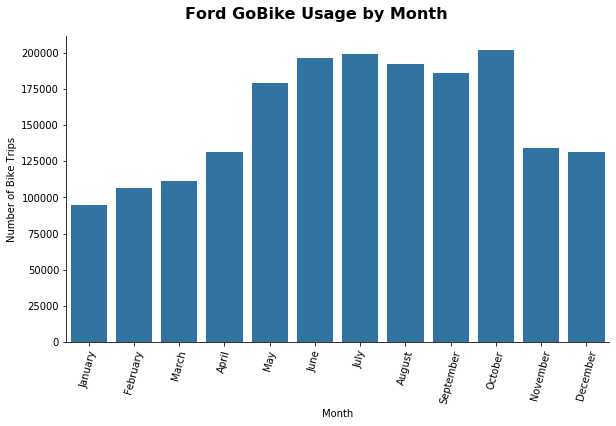

In [55]:
# Monthly usage of the Ford Go Bike system
graph = sb.catplot(data = df_cleaned, x = 'start_time_month', kind = 'count', color = no_color, aspect = 1.7);

graph.set_axis_labels('Month', 'Number of Bike Trips'),

graph.fig.suptitle('Ford GoBike Usage by Month', y = 1.05, fontsize = 16, fontweight = 'bold');

graph.set_xticklabels(rotation=75);

###### Observation 1: Not surprisingly, the summer months and early-mid fall are the most popular times to use the Ford Go Bike sharing system. October is the most popular month, with July as the second most popular, and June/August coming in closely as the third most popular months to use the bike system. The weather in San Francisco is best in the mid-late summer and usually stays sunny until returning to its usual foggy weather in the late fall/early winter months.

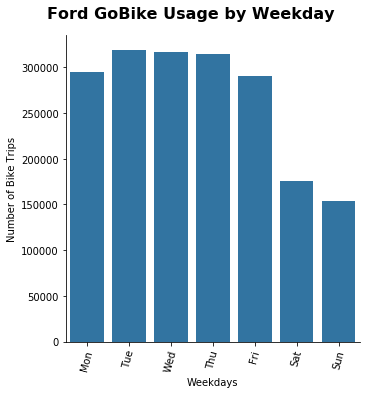

In [56]:
# Weekday usage of the Ford Go bike system
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

graph = sb.catplot(data=df_cleaned, x='start_time_weekday', kind='count', color = no_color, order = weekday)

graph.set_axis_labels('Weekdays', 'Number of Bike Trips')

graph.fig.suptitle('Ford GoBike Usage by Weekday', y=1.05, fontsize=16, fontweight='bold');

graph.set_xticklabels(rotation=75);

###### Observation 2: Tuesdays and Wednesdays seem to be the most popular days for using the bike sharing system, however Thursdays, Mondays and Fridays are very close to the Tues/Weds numbers. The usage drops significantly on Saturdays and Sundays suggesting the Ford bike share system is used primarily for commuting purposes during working days.

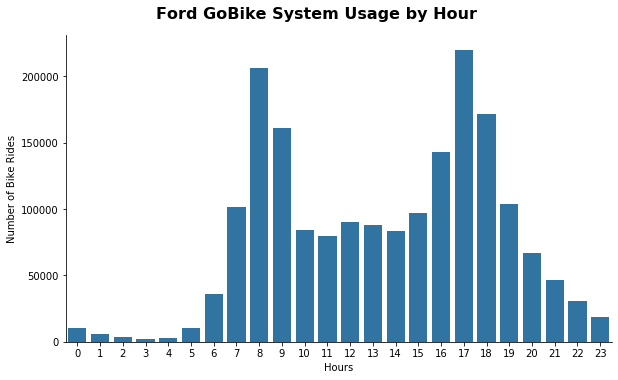

In [57]:
# Hourly usage of the Ford Go Bike System
graph = sb.catplot(data = df_cleaned, x='start_time_hour', kind='count', color = no_color, aspect = 1.7)

graph.set_axis_labels('Hours', 'Number of Bike Rides')

graph.fig.suptitle('Ford GoBike System Usage by Hour', y=1.05, fontsize=16, fontweight='bold');

###### Observation 3: The bikes saw the most usage during the morning hours of 8-9am, and in the afternoon hours of 5-6pm, which is a typical workday in the United States. This furthers the suggestion that the bikes are being used primarily for commuters.

In [58]:
df_cleaned.duration_min.describe()

count    1.863721e+06
mean     1.379682e+01
std      3.950700e+01
min      1.000000e+00
25%      5.000000e+00
50%      9.000000e+00
75%      1.400000e+01
max      1.439000e+03
Name: duration_min, dtype: float64

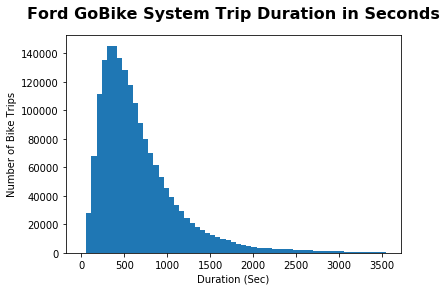

In [59]:
# Duration of the bike rides - in SECONDS
bin_edges = np.arange(0, 3600, 60)

plt.hist(data = df_cleaned, x = 'duration_sec', bins = bin_edges);

plt.title("Ford GoBike System Trip Duration in Seconds", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Duration (Sec)')
plt.ylabel('Number of Bike Trips');

In [60]:
df_cleaned.duration_min.describe(percentiles = [.95])
df_cleaned.duration_min.describe()

count    1.863721e+06
mean     1.379682e+01
std      3.950700e+01
min      1.000000e+00
25%      5.000000e+00
50%      9.000000e+00
75%      1.400000e+01
max      1.439000e+03
Name: duration_min, dtype: float64

In [61]:
df_cleaned.duration_min.mean()

13.796815081227287

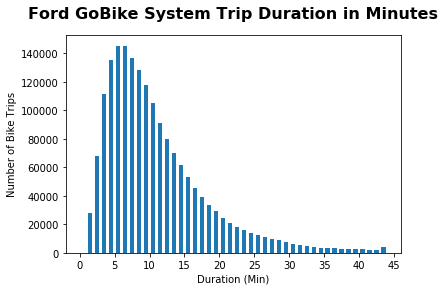

In [62]:
# Duration of the bike rides -in MINUTES
bin_edges = np.arange(0, 45, 1)
ticks = [0, 5, 10, 15, 20, 25, 30,  35, 40, 45]
labels = ['{}'.format(val) for val in ticks]

plt.hist(data = df_cleaned, x = 'duration_min', bins = bin_edges, rwidth = 0.6);
#sb.distplot(df_cleaned['duration_min'], bins = bin_edges, kde = False, hist_kws = {'alpha' : 1});

plt.title("Ford GoBike System Trip Duration in Minutes", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Duration (Min)')
plt.xticks(ticks, labels)
plt.ylabel('Number of Bike Trips');

###### Observation 4: The average trip is just under 13.8 minutes, with 75% of trips being under 14 minutes. Looking at the histogram, most rides fall in between the 3 - 11 minute range. This suggests riders are taking the bikes short distances.

In [63]:
df_cleaned.distance_miles.describe()

count    1.863721e+06
mean     9.885569e-01
std      6.389948e-01
min      0.000000e+00
25%      5.390663e-01
50%      8.541301e-01
75%      1.297083e+00
max      4.058128e+01
Name: distance_miles, dtype: float64

In [64]:
df_cleaned.distance_miles.mean()

0.9885568560652287

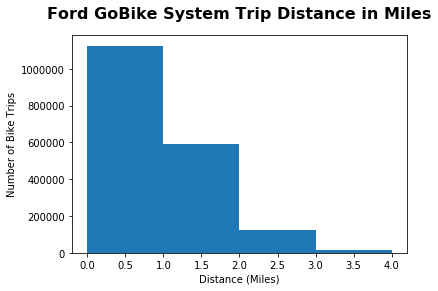

In [65]:
# Distance in miles traveled
bin_edges = np.arange(0, 5, 1)

plt.hist(data = df_cleaned, x = 'distance_miles', bins = bin_edges);

plt.title("Ford GoBike System Trip Distance in Miles", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Distance (Miles)')
plt.ylabel('Number of Bike Trips');

###### Observation 5: The mean distance traveled is 0.99 miles, with 75% of rides being 1.29 miles or less. Looking at the histogram above a majority of the rides fall under 2 miles, with over half of those 1 mile of less.

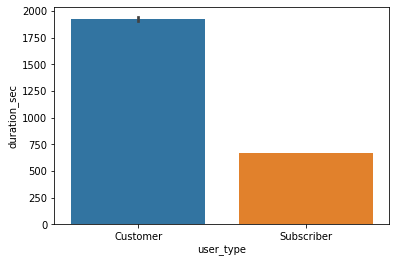

In [66]:
#Total duration in seconds of usage of the bike sharing system by Customer and Subscriber (coding with seaborn)
sb.barplot(x='user_type', y='duration_sec', data=df_cleaned)

###### Observation 6: The above plot indicateds that the duration of usage of the bike sharing system were more by customers than the members. 

In [67]:
#Most commonly used start_station, which start_station has high demand
df_cleaned.start_station_id.value_counts(sort=True)

15.0     38461
67.0     37617
30.0     35092
58.0     34918
81.0     33716
         ...  
301.0       93
359.0       91
358.0       52
374.0       25
48.0        11
Name: start_station_id, Length: 332, dtype: int64

In [68]:
df_max_station = df_cleaned[df_cleaned.start_station_id == '15.0']

In [69]:
df_max_station

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_share_for_all_trip,start_time_month,start_time_month_num,start_time_weekday,start_time_hour,end_time_hour,duration_min,start_date,distance_km,distance_miles
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,No,January,1,Wed,16,15,1423,2018-01-31,0.000000,0.000000
30,375,2018-01-31 22:56:31.082,2018-01-31 23:02:46.583,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,6.0,The Embarcadero at Sansome St,37.804770,...,No,January,1,Wed,22,23,6,2018-01-31,1.310345,0.814210
90,451,2018-01-31 21:57:35.425,2018-01-31 22:05:07.018,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,6.0,The Embarcadero at Sansome St,37.804770,...,No,January,1,Wed,21,22,7,2018-01-31,1.310345,0.814210
141,841,2018-01-31 21:25:01.905,2018-01-31 21:39:03.712,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,58.0,Market St at 10th St,37.776619,...,No,January,1,Wed,21,21,14,2018-01-31,2.916783,1.812404
207,511,2018-01-31 21:01:37.141,2018-01-31 21:10:08.258,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,81.0,Berry St at 4th St,37.775880,...,No,January,1,Wed,21,21,8,2018-01-31,2.171534,1.349328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1863408,646,2018-12-01 09:53:28.241,2018-12-01 10:04:14.959,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,6.0,The Embarcadero at Sansome St,37.804770,...,No,December,12,Sat,9,10,10,2018-12-01,1.310345,0.814210
1863504,369,2018-12-01 08:44:23.469,2018-12-01 08:50:33.300,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,6.0,The Embarcadero at Sansome St,37.804770,...,No,December,12,Sat,8,8,6,2018-12-01,1.310345,0.814210
1863528,471,2018-12-01 08:24:44.547,2018-12-01 08:32:36.223,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,50.0,2nd St at Townsend St,37.780526,...,No,December,12,Sat,8,8,7,2018-12-01,1.688445,1.049151
1863556,2644,2018-12-01 07:23:10.895,2018-12-01 08:07:15.015,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,23.0,The Embarcadero at Steuart St,37.791464,...,No,December,12,Sat,7,8,44,2018-12-01,0.517986,0.321862


###### Observation 7: The San Fransisco Ferry Building station had the most riders as origin point. 

#### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Thankfully, due to thorough cleaning efforts there were no big surprises during the exploratory and visualization phase. The duration of the bike ride and the distance gave me a little trouble since there were some outliers I didn't anticipate.

#### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Nothing seems out of the normal expectations for a bike sharing system in a major city. So far, the data reveals that weekdays are significant in sharing bike system. 

## Bivariate Exploration
In this section, I investigate relationships between pairs of variables in the data.

In [70]:
# Customers vs Subscribers
customer = df_cleaned.query('user_type == "Customer"')['bike_id'].count()
subscriber = df_cleaned.query('user_type == "Subscriber"')['bike_id'].count()
customer_prop = customer / df_cleaned['bike_id'].count()
subscriber_prop = subscriber / df_cleaned['bike_id'].count()

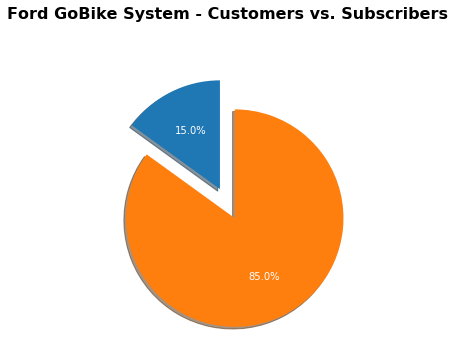

In [71]:
# Customers vs Subscribers Visuals
# pie chart
plt.figure(figsize = [8, 5])

labels = ['Customer', 'Subscriber']
size = [customer_prop, subscriber_prop]
explode = (0, 0.3)

plt.pie(size, explode=explode, labels = labels, autopct='%1.1f%%', shadow=True, startangle=90, textprops={'color':'white'})
plt.axis('equal')

plt.suptitle('Ford GoBike System - Customers vs. Subscribers', y=1.05, fontsize=16, fontweight='bold');

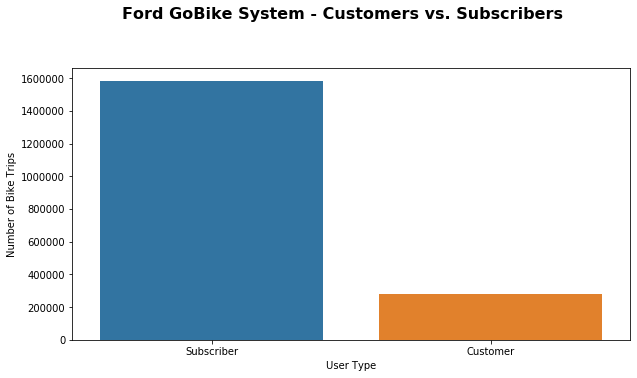

In [72]:
# Customers vs Subscribers Visuals
# bar chart
plt.figure(figsize = [10, 5])

graph = sb.countplot(data = df_cleaned, x = "user_type", order = df_cleaned.user_type.value_counts().index);
graph.set_xlabel('User Type');
graph.set_ylabel('Number of Bike Trips');
plt.suptitle('Ford GoBike System - Customers vs. Subscribers', y=1.05, fontsize=16, fontweight='bold');

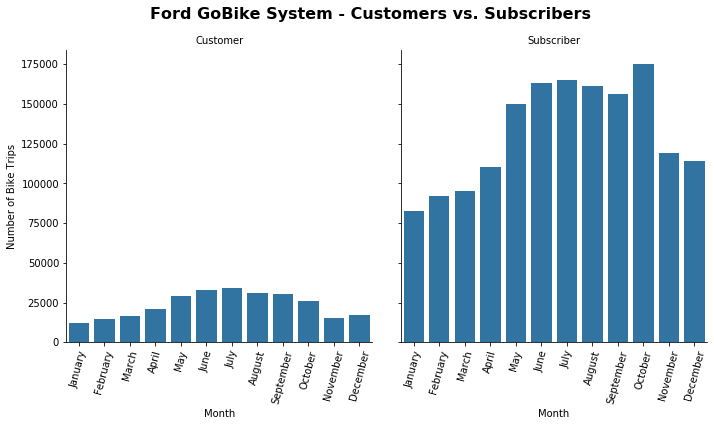

In [73]:
# Customer Usage by Month vs. Subscriber Usage by Month
#plt.figure(figsize = [12, 5])
graph = sb.catplot(data=df_cleaned, x='start_time_month', col="user_type", kind='count', sharey = True, color = no_color);

graph.set_axis_labels("Month", "Number of Bike Trips");
graph.set_titles("{col_name}");

graph.fig.suptitle('Ford GoBike System - Customers vs. Subscribers', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75);

###### Observation 2: Winter months are the worst for the bike sharing system for both groups what can be determined by the harsher weather.
Customers: demand is high around summertime, reaching its peak in July. Customers are most probably tourists, or the occasional riders who visit the Bay Area.
Subscribers: the highest demand is from May till October, reaching it's peak in October. Subscribers are most likely riders using the bikes for their daily commute.

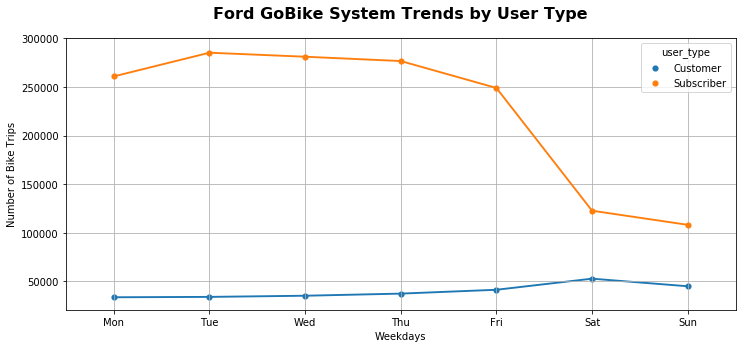

In [74]:
# Customer Usage by Weekday vs. Subscriber Usage by Weekday
plt.figure(figsize=(12, 5))

df_cleaned_user_week = df_cleaned.groupby(['start_time_weekday', 'user_type']).size().reset_index()
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

ax = sb.pointplot(data=df_cleaned_user_week, x='start_time_weekday', y=0, hue = 'user_type', scale=.7, order = weekday);

plt.title('Ford GoBike System Trends by User Type', y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Weekdays')
plt.ylabel('Number of Bike Trips');
plt.grid()

###### Observation 3: The point plot above is an excellent visual showing the sharp contrast between Customers and Subscribers. Customers have a relatively low usage of the bike share system with a small increase on the weekends. Subscribers are the opposite - there is steadily high usage on weekdays, with a sharp decline on the weekend.

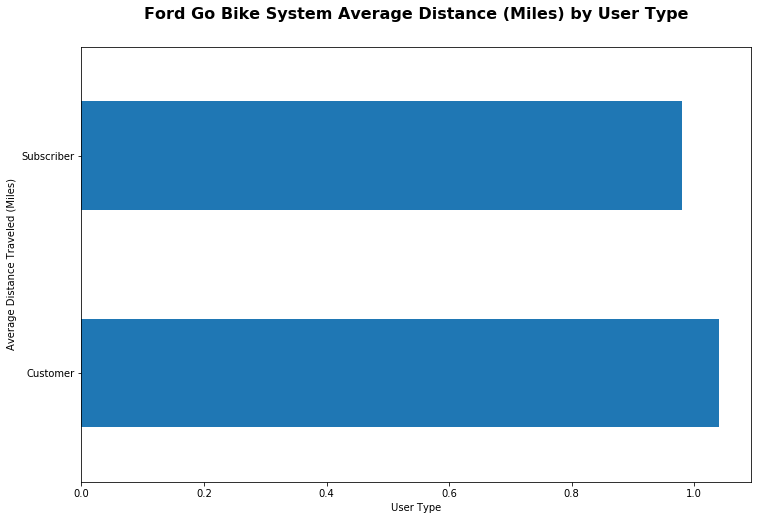

In [75]:
# Customer Usage by Distance vs. Subscriber Usage by Distance
plt = df_cleaned.groupby('user_type')['distance_miles'].mean().plot(kind='barh', figsize=(12,8));

plt.set_title('Ford Go Bike System Average Distance (Miles) by User Type', y=1.05, fontsize=16, fontweight='bold')
plt.set_xlabel('User Type')
plt.set_ylabel('Average Distance Traveled (Miles)');

###### Observation 4: The average distance traveled by customers is slightly higher than subscribers. Since the data exploration thus far suggests subscribers are using the bike share system for commuting purposes, that suggestion also implies that the commuting distance for the subscribers is less than the average ride a customer takes

In [76]:
df_cleaned.duration_min.describe(percentiles = [.95])

count    1.863721e+06
mean     1.379682e+01
std      3.950700e+01
min      1.000000e+00
50%      9.000000e+00
95%      3.000000e+01
max      1.439000e+03
Name: duration_min, dtype: float64

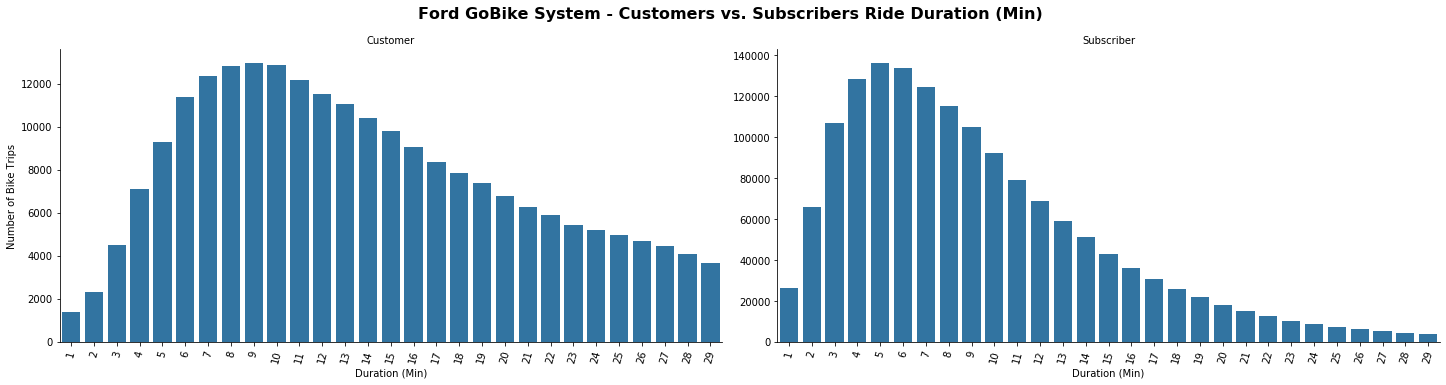

In [77]:
# Customer Usage by Duration vs. Subscriber Usage by Duration

data = df_cleaned.query('duration_min < 30')

graph = sb.catplot(data=data, x = 'duration_min', col='user_type', kind='count', sharey = False, color = no_color, height=5, aspect=2);

graph.set_axis_labels('Duration (Min)', 'Number of Bike Trips')
graph.set_titles('{col_name}')

graph.fig.suptitle('Ford GoBike System - Customers vs. Subscribers Ride Duration (Min)', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75);

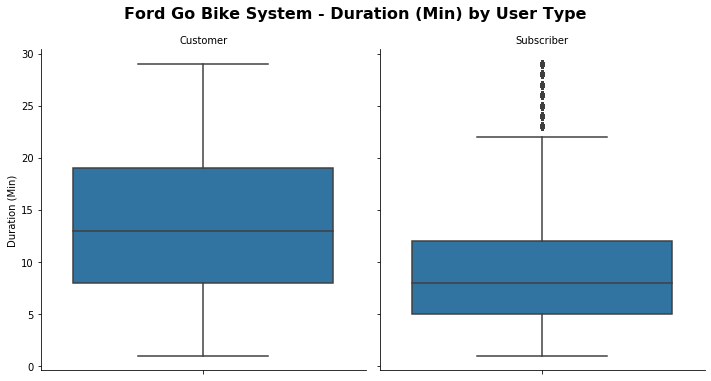

In [78]:
data = df_cleaned.query('duration_min < 30')

g = sb.catplot(data=data, y='duration_min', col="user_type", kind='box', color = no_color)

g.set_titles(col_template = '{col_name}')
g.set_axis_labels("", "Duration (Min)")
g.fig.suptitle('Ford Go Bike System - Duration (Min) by User Type', y=1.05, fontsize=16, fontweight='bold');

###### Observation 5: The plots above show the ride duration spread in minutes (note the y-axis isn't shared between the Customer and Subscriber graphs in order to visualize trends easier). Customer typically have trip durations are longer (8 to 18 minutes according to the box plot) than for subscribers (5 to 12 minutes according to the box plot). This can probably be explained by the fact that subscribers are mainly commuters who take short trips to work/school rather than longer trips around the Bay Area.

#### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Adding the user type to the analysis revealed different behavior usage between customers and subscribers. The data suggests that customers are casual riders such as tourists, or students on a school vacation or holiday. This is accurate when factoring in that Customer usage increases on the weekends, and peaks during the month of July. In contrast, the data suggests Subscribers are daily commuters or full time students who use the system during weekdays, better weather, and mostly for shorter distances. They mainly rent bikes before and after a typical work or school day (8-9am and 5-6pm).

#### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

There is a difference in the trip duration between customers and subscribers. Customers trips are usually longer than for subscribers, most probably due to the fact they prefer bike rides around weekends in summertime, which may be for longer trips around the surrounding area. Subscribers use the system mainly for commute purposes so they prefer quick, short rides to and from work.

## Multivariate Exploration
I created plots of three or more variables to investigate the Ford Go Bike data even further.

TypeError: 'Text' object is not callable

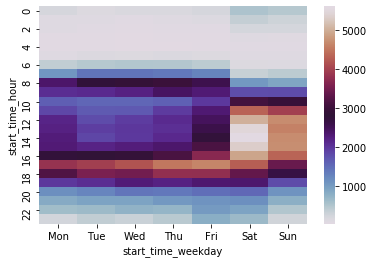

In [87]:
# Weekday order
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df_cleaned['start_time_weekday'] = pd.Categorical(df_cleaned['start_time_weekday'], categories= ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], ordered=True);

#plt.figure(figsize=(15,8))

# Heatmap - Customers
#plt.subplot(1, 2, 1)
df_customer = df_cleaned.query('user_type == "Customer"').groupby(['start_time_hour', 'start_time_weekday'])['bike_id'].size().reset_index();
df_customer = df_customer.pivot('start_time_hour', 'start_time_weekday', 'bike_id')

heat_map = sb.heatmap(df_customer, cmap = 'twilight')

plt.title('Customer', y=1.05)
plt.xlabel('Weekday', labelpad = 16)
plt.ylabel('Start Time Hour',  labelpad = 16)

plt.show()

#graph.suptitle('Ford GoBike System - Start Time vs. Weekday by User Type', y = 1.05, fontsize = 16, fontweight = 'bold');

###### Please reference the slide deck with the correct visual - after much trial and error I can not get the code to work properly in this notebook.¶

TypeError: 'Text' object is not callable

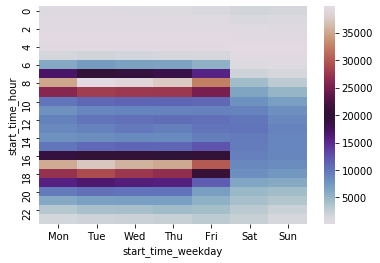

In [88]:
# Heatmap - Subscribers
#plt.subplot(1, 2, 2)
df_subscriber = df_cleaned.query('user_type == "Subscriber"').groupby(['start_time_hour', 'start_time_weekday'])['bike_id'].size().reset_index();
df_subscriber = df_subscriber.pivot('start_time_hour', 'start_time_weekday', 'bike_id')
hot_map = sb.heatmap(df_subscriber, cmap = 'twilight')

plt.title("Subscriber", y=1.05)
plt.xlabel('Weekday', labelpad = 16)
plt.ylabel('Start Time Hour', labelpad = 16);

plt.show()

###### Please reference the slide deck with the correct visual - after much trial and error I can not get the code to work properly in this notebook.

###### Observation 1: Customers use the bike sharing system more often on weekends, whilte Subscribers primarily use the bikes on weekdays.
Customers: During weekdays, most bike rides occur between 4-6pm, peaking on Fridays around 5pm. During weeknds, most bike rides occur between 10am and 6pm, peaking on Saturdays around 12am.
Subscribers: During weekdays, most bike rides occur around 8-9am and 4-6pm. 

#### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

This section essentially amplified the previous data topics of exploration through different visuals and adding in more variables to compare to other variables. Subscriber vs Customer age was expanded upon through the use of age groups, and a pointplot to demonstrate the varing habits of each age group. The heatmap didn't reveal anything new for the time based discussion on when and what time each user group uses the bike sharing system. As previously noted, Customers use the system at almost the opposite time as the Subscribers.

#### Were there any interesting or surprising interactions between features?

Nothing out of the expected here. It was interesting to note the sharp monthly difference for males vs. females vs. other, and how close the female count got to the male Customer count in January through March. This may be a potential loss of possible Customers converting to Subscribers.

## Summary

This project is a win - win situation where a large number of people can benefit from this program:

- Environmentally friendly, budget friendly, and lifetsyle friendly.
- Subscribers (i.e. daily commuters) benefit from a health commuting choice
- Customers (i.e. tourists, students, etc.) have a sustainable, yet flexible option for touring the city.
- Affordable and convenient transportation for the people of all socioeconomic classes

Renting a bike from theFord GoBike System is a fantastic (healthy and environmentally friendly) way of moving around in the city, both for enjoyment and work. There are two types of clients using the system: Subscribers and Customers. Subscribers are primarily daily commuters, having short trips to and from work, who rent a bike on weekdays at 8-9am and 5-6pm, and, occasionally around lunch time. Customers are usually tourists or occassional riders who use the system mainly on weekends to explore the Bay Area.

## Sources

- FordGoBike Data Set
- Haversine formula used to calculate distances using latitude and longitude
- Seaborn catplot documentation
- Matplotlib histogram documentation
- IPython Display documentation
- Seaborn heatmap documentation and tutorial